# ADS-564 FINAL PROJECT 

# GENERATIVE DEEP LEARNING

In [1]:
# VARIATIONAL AUTOENCODER

### IMPORT REQUIRED LIBRARIES

In [2]:

import numpy as np
from scipy.stats import norm
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
import matplotlib.pyplot as plt
import os
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
from zipfile import ZipFile
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import MaxPool2D, AvgPool2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import LeakyReLU

from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Lambda

from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Add, Multiply
from tensorflow.keras.losses import mse, binary_crossentropy
from keras import backend
from keras import utils
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import CenterCrop
from tensorflow.keras.layers import Resizing
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# DATASET 


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
import os
import numpy as np
all_image_path = []

full_image_train_path = '../input/celeba-dataset/img_align_celeba/img_align_celeba'
for path in os.listdir(full_image_train_path):
    if '.jpg' in path:
        all_image_path.append(os.path.join(full_image_train_path, path))
    
data = all_image_path[0:50000]
data=np.array(data)

print(len(data))

50000


In [7]:
from PIL import Image
# To load an image from a file, we use the open() function in the Image module, passing it the path to the image.
cropping_box = (30, 55, 150, 175) 

#train = [np.array((Image.open(path).crop(cropping_box)).resize((64,64))) for path in data]
train = [np.array((Image.open(path)).resize((64,64))) for path in data]

In [8]:
data_train=all_image_path[0:40000]
data_train=np.array(data_train)


In [9]:
train = [np.array((Image.open(path)).resize((64,64))) for path in data_train]

In [10]:
for i in range(len(train)):
    train[i] = train[i].astype("float32") / 255 
    #train[i] = train[i]*2-1  #uncomment this if activation is tanh for generator last layer
    
train_array = np.array(train)

In [11]:
print(train_array.shape) # (2000, 64, 64, 3)

(40000, 64, 64, 3)


In [8]:
data_val=all_image_path[51000:53000]
data_val=np.array(data_val)

In [12]:
data_test=all_image_path[42000:44000]
data_test=np.array(data_test)

In [13]:
test = [np.array((Image.open(path)).resize((64,64))) for path in data_test]

In [11]:
val = [np.array((Image.open(path)).resize((64,64))) for path in data_val]

In [14]:
for i in range(len(test)):
    test[i] = test[i].astype("float32") / 255 
    #train[i] = train[i]*2-1  #uncomment this if activation is tanh for generator last layer
    
test_array = np.array(test)

In [14]:
for i in range(len(val)):
    val[i] = val[i].astype("float32") / 255 
    #train[i] = train[i]*2-1  #uncomment this if activation is tanh for generator last layer
    
val_array = np.array(val) 

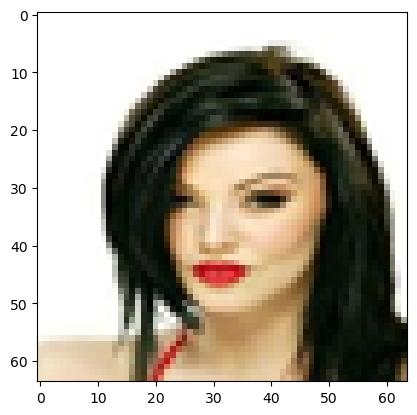

In [15]:
plt.imshow(test_array[1])

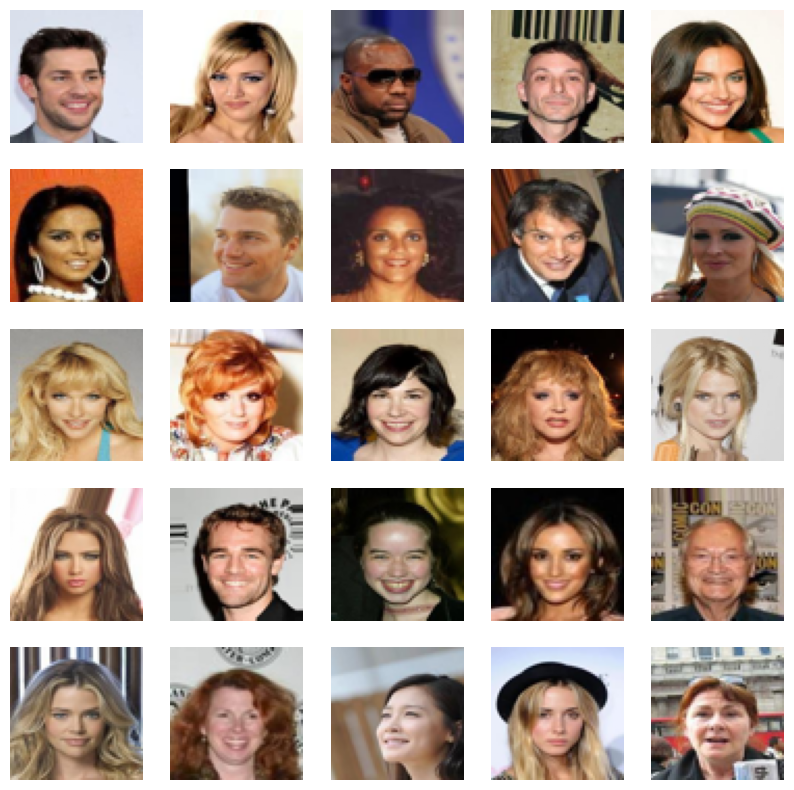

In [16]:
from matplotlib import pyplot as plt

plt.figure(1, figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_array[i])
    plt.axis('off')
plt.show()

# WHAT IS VARIATIONAL AUTO ENCODER

Variational autoencoder can be defined as being an autoencoder whose training is regularised to avoid overfitting and ensure that the latent space has good properties that enable generative process.

Variational autoencoder are probabilistic generative models that require neural networks as only a part of their overall structure. The neural network components are typically referred to as the encoder and decoder for the first and second component respectively. 
There are actually only two parts that we need to change except from standard autoencoder: the encoder and the loss function.

<p style="text-align:center;"><img src="https://miro.medium.com/v2/resize:fit:800/format:webp/1*nGFy96r63GwSE_EsJDLMDw.png" alt="Logo"></p>

<p style="text-align:center;"><img src="https://miro.medium.com/v2/resize:fit:800/format:webp/1*r1R0cxCnErWgE0P4Q-hI0Q.jpeg" alt="Logo"></p>


Variational autoencoders assume that there is no correlation between any of the dimensions in the latent space and therefore that the covariance matrix is diagonal. This means the encoder only needs to map each input to a mean vector and a var‐ iance vector and does not need to worry about covariance between dimensions.

We also choose to map to the logarithm of the variance, as this can take any real number in the range (– ∞, ∞), matching the natural output range from a neural network unit, whereas variance values are always positive.
To summarize, the encoder will take each input image and encode it to two vectors, mu and log_var which together define a multivariate normal distribution in the latent space:
mu and log_var.

The logarithm of the variance of each dimension.
To encode an image into a specific point z in the latent space, we can sample from this distribution, using the following equation:

                    z = mu + sigma * epsilon
where

                    sigma = exp(log_var / 2)
    
             4σ=exp logσ =(exp2log(σ)/2)=exp(log(σ2)/2)

epsilon is a point sampled from the standard normal distribution.

A variational autoencoder is an architecture composed of both an encoder and a decoder and that is trained to minimise the reconstruction error between the encoded-decoded data and the initial data. However, in order to introduce some regularisation of the latent space, we proceed to a slight modification of the encoding-decoding process: instead of encoding an input as a single point, we encode it as a distribution over the latent space. The model is then trained as follows:

Step-1) The input is encoded as distribution over the latent space

Step-2) A point from the latent space is sampled from that distribution
 
Step-3) The sampled point is decoded and the reconstruction error can be computed

Step-4) The reconstruction error is backpropagated through the network

<p style="text-align:center;"><img src="https://miro.medium.com/v2/resize:fit:2000/format:webp/1*ejNnusxYrn1NRDZf4Kg2lw@2x.png" alt="Logo"></p>


In [17]:
#SET A SEED FOR REPRODUCABILITY
np.random.seed(10)


In [23]:
from tensorflow.keras import layers
def create_encoder():
    
    inputs = keras.Input(shape=(64,64,3))

    # 32x4x4 conv, stride 2 + BN + LeakyReLU
    x = layers.Conv2D(32,(4, 4), strides=2, padding='same', activation=None)(inputs)
    x = layers.BatchNormalization(axis=-1)(x) # axis=-1 as data format is 'channels_last' and we want to normalize each channel
    x = layers.LeakyReLU(alpha=0.3)(x)

    #64x4x4 conv, stride 2 + BN + LeakyReLU
    x = layers.Conv2D(64,(4, 4), strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    #128x4x4 conv, stride 2 + BN + LeakyReLU
    x = layers.Conv2D(128,(4, 4), strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    #256x4x4 conv, stride 2 + BN + LeakyReLU
    x = layers.Conv2D(256,(4, 4), strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    # flatten the output
    x = layers.Flatten(data_format='channels_last')(x)

    # distribution parameters
    z_mean = layers.Dense(units=100, activation=None)(x)
    z_log_sigma = layers.Dense(units=100, activation=None)(x)

    # use these parameters to sample new similar points from the latent space:
    def sampling(args):
        z_mean, z_log_sigma = args
        #epsilon = backend.random_normal(shape=(1, 100), mean=0., stddev=0.1)
        epsilon = backend.random_normal(shape=(1, 100), mean=0., stddev=1.)
        return z_mean + backend.exp(z_log_sigma / 2) * epsilon 


    z = layers.Lambda(sampling)([z_mean, z_log_sigma])

   
    
    # Create encoder
    encoder = Model(inputs,[z_mean, z_log_sigma, z], name='encoder')
    #encoder.summary()
    
    return encoder

In [24]:
encoder=create_encoder()
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   1568        ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 32, 32, 32)   0           ['batch_normalization[0][0]

In [25]:
def create_decoder():
    
    inputs = keras.Input(shape=(100))

    x = layers.Dense(units=4096, activation='relu')(inputs)
    x = layers.Reshape((4,4,256))(x)

    # upsample + conv128x3x3 + BN + LeakyReLU
    x = layers.UpSampling2D((2,2), data_format='channels_last', interpolation='nearest')(x) 
    x = layers.Conv2D(128,(3, 3), padding='same', strides=(1,1))(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    # upsample + conv64x3x3 + BN + LeakyReLU
    x = layers.UpSampling2D((2,2))(x) 
    x = layers.Conv2D(64,(3, 3), padding='same')(x) 
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    # upsample + conv32x3x3 + BN + LeakyReLU
    x = layers.UpSampling2D((2,2))(x) 
    x = layers.Conv2D(32,(3, 3), padding='same')(x) 
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    # upsample + conv128x3x3
    x = layers.UpSampling2D((2,2))(x) 
    decoded = layers.Conv2D(3,(3, 3), padding='same')(x)

    decoder = Model(inputs, decoded, name='decoder')
    return decoder

In [26]:
decoder=create_decoder()
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 8, 8, 256)        0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 128)         295040    
                                                                 
 batch_normalization_4 (Batc  (None, 8, 8, 128)        512       
 hNormalization)                                           

In [27]:
class PVAE(keras.Model):
    
    def __init__(self, encoder, decoder, alpha, beta, **kwargs):
        super(PVAE, self).__init__(**kwargs)
        #self.preprocesser = preprocesser
        self.encoder = encoder
        self.decoder = decoder
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")
        self.loss_wo_weight_tracker = tf.keras.metrics.Mean(name="loss_wo_weight")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")
        self.alpha = alpha
        self.beta = beta

    @property
    def metrics(self):
        # We list our `Metric` objects here so that `reset_states()` can be
        # called automatically at the start of each epoch
        # or at the start of `evaluate()`.
        # If you don't implement this property, you have to call
        # `reset_states()` yourself at the time of your choosing.
        return [
            self.loss_tracker,
            self.loss_wo_weight_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]
    
    def forward(self, data):
        # Forward pass
        z_mean, z_log_sigma, z = self.encoder(data)
        reconstruction = self.decoder(z)
        return z_mean, z_log_sigma,reconstruction
    
    def compute_loss(self, data, z_mean, z_log_sigma, reconstruction):
        reconstruction_loss = tf.reduce_mean(tf.keras.losses.mean_squared_error(data, reconstruction))
        kl_loss = ( -0.5 * (1 + z_log_sigma - tf.square(z_mean) - tf.exp(z_log_sigma)))*0.0001
        kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
        loss_wo_weight = reconstruction_loss + kl_loss
        loss = self.alpha * reconstruction_loss + self.beta * kl_loss
        return reconstruction_loss, kl_loss, loss, loss_wo_weight
    
    def train_step(self, data):
        with tf.GradientTape() as tape:
            # Forward pass
            z_mean, z_log_sigma, reconstruction = self.forward(data)
            # Compute the loss value
            reconstruction_loss, kl_loss, loss, loss_wo_weight = self.compute_loss(data, z_mean, z_log_sigma, reconstruction)
        # Compute gradients
        grads = tape.gradient(loss, self.trainable_variables)
        # Update weights
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        # Update metrics (metrics = losses in our case)
        self.loss_tracker.update_state(loss)
        self.loss_wo_weight_tracker.update_state(loss_wo_weight)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        # Return metrics
        return {
            "loss": self.loss_tracker.result(),
            "loss_wo_weight": self.loss_wo_weight_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }
    
    def call(self, data):
        # Forward pass
        z_mean, z_log_sigma, reconstruction = self.forward(data)
        # Compute the loss value
        reconstruction_loss, kl_loss, loss, loss_wo_weight = self.compute_loss(data, z_mean, z_log_sigma, reconstruction)
        # Update metrics (metrics = losses in our case)
        self.loss_tracker.update_state(loss)
        self.loss_wo_weight_tracker.update_state(loss_wo_weight)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        # Return metrics
        return {
            "loss": self.loss_tracker.result(),
            "loss_wo_weight": self.loss_wo_weight_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
            "reconstruction":reconstruction,
        }        


In [28]:
alpha = 1.8
beta = 10
lr = 0.0015
batch_size = 64

#ppreprocesser = create_preprocesser()
pencoder = create_encoder()
pdecoder = create_decoder()
pvae = PVAE(pencoder, pdecoder, alpha, beta)
pvae.compile(optimizer=keras.optimizers.Adam(lr))

callbacks = [
    ReduceLROnPlateau(monitor='val_loss_wo_weight', factor=0.2, patience=2, verbose=1, mode='min'),
    ModelCheckpoint(filepath='./pvae/', monitor="val_loss_wo_weight", verbose=1, save_best_only=True)
]
history_pvae = pvae.fit(x=train_array, epochs=30, batch_size=batch_size, callbacks=callbacks)


Epoch 1/30
625/625 [==============================] - 29s 21ms/step - loss: 0.1451 - loss_wo_weight: 0.0768 - reconstruction_loss: 0.0759 - kl_loss: 8.4199e-04 - lr: 0.0015
Epoch 2/30
625/625 [==============================] - 13s 20ms/step - loss: 0.1020 - loss_wo_weight: 0.0514 - reconstruction_loss: 0.0502 - kl_loss: 0.0012 - lr: 0.0015
Epoch 3/30
625/625 [==============================] - 13s 21ms/step - loss: 0.0893 - loss_wo_weight: 0.0432 - reconstruction_loss: 0.0418 - kl_loss: 0.0014 - lr: 0.0015
Epoch 4/30
625/625 [==============================] - 13s 20ms/step - loss: 0.0819 - loss_wo_weight: 0.0387 - reconstruction_loss: 0.0372 - kl_loss: 0.0015 - lr: 0.0015
Epoch 5/30
625/625 [==============================] - 13s 21ms/step - loss: 0.0775 - loss_wo_weight: 0.0361 - reconstruction_loss: 0.0346 - kl_loss: 0.0015 - lr: 0.0015
Epoch 6/30
625/625 [==============================] - 13s 21ms/step - loss: 0.0771 - loss_wo_weight: 0.0360 - reconstruction_loss: 0.0345 - kl_loss: 0.

In [29]:
# summarize history for losses
def display_history(history):
    
    fig=plt.figure(figsize=(20,5))
    plt.plot(history.history['reconstruction_loss'])
    plt.plot(history.history['loss_wo_weight'])
    plt.plot(history.history['kl_loss'])

    plt.title('reconstruction_loss and total_loss and kl_loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')


    plt.show()

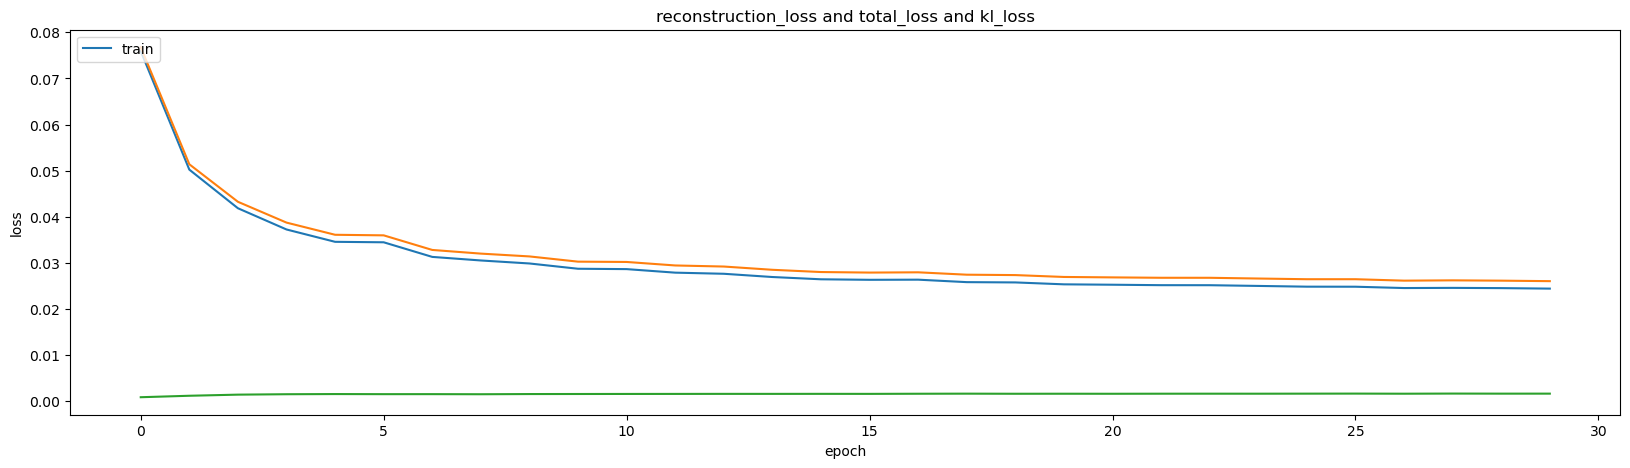

In [30]:
display_history(history_pvae)

In [31]:
y_pred= pvae.predict(test_array)


63/63 [==============================] - 1s 7ms/step


In [69]:
def display_fake_images(decoder):
    z = np.random.normal(loc=0.0, scale=0.5, size=(10,100,1))
    fakefaces = pdecoder(z)

    plt.figure(figsize=(20, 5))
    for i in range(0, len(fakefaces)):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow((fakefaces[i]*255).numpy().astype("uint8"))
        plt.axis("off")
    plt.show();

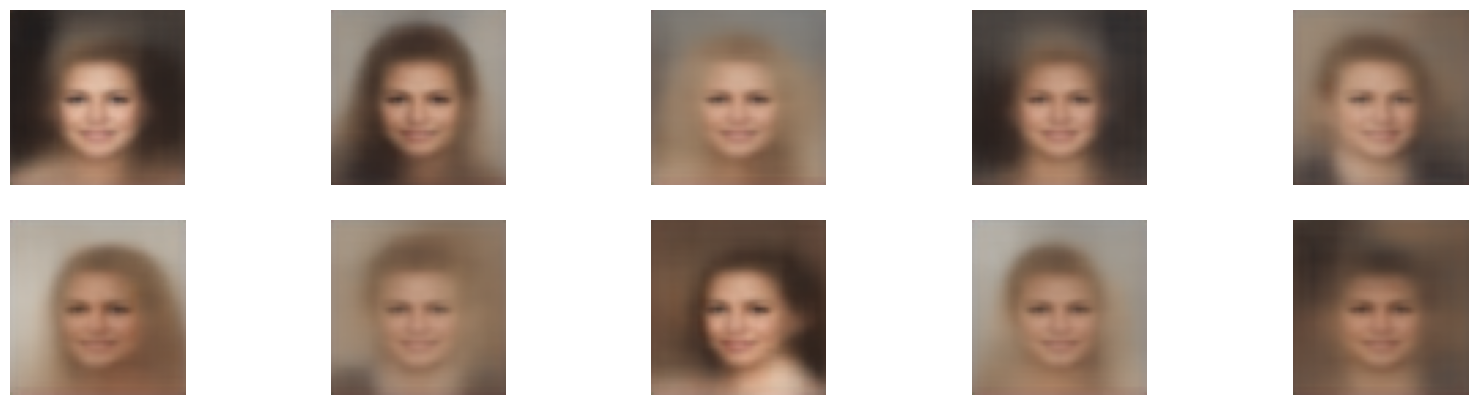

In [70]:
display_fake_images(pdecoder)